In [1]:
import flammkuchen as fl
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from fig_5_helper import flatten, reshape_feature_array, catname

### Load data

In [4]:
fig_dir = Path(r'\\portulab.synology.me\data\Kata\Figures_Paper\Figure_5\fig_5')

In [5]:
master_path_2 = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\fin_tail_nn')
ds = np.load(Path(master_path_2 /'fin_data'/'model_data_test.npz'))
print(*ds.files,sep="\n")

original_index
proba
clusters
tail_dir
tails
fins
reconstructions
latents
inputs
model_targets
original_tensor


In [6]:
clusters = ds['clusters']
fin_l = ds['fins'][:,0, :]
fin_r = ds['fins'][:,1, :]
ds['fins'].shape

(1824, 2, 175)

In [7]:
r2 = fl.load(master_path_2/ 'R2_sample.h5')

In [12]:
r2_flat = flatten(r2)
r2_flat = np.asarray(r2_flat)

(1823,)

In [8]:
master_path = Path(r'\\portulab.synology.me\data\Kata\Processed_Data\tensor_data')
path_tensors = Path(master_path/ 'peaks_valleys'/ 'tensor_ipsi_contra_pos.h5')
path_features = Path(master_path/ 'features_ipsi_contra.csv')

l_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/  'l_feature_vector_array.h5')
r_feature_vector_array = fl.load(master_path/ 'peaks_valleys'/  'r_feature_vector_array.h5')

In [9]:

l_reshaped_array, l_peaks_a_array, l_peaks_i_array, l_valleys_a_array, l_valleys_i_array = reshape_feature_array(l_feature_vector_array)
r_reshaped_array, r_peaks_a_array, r_peaks_i_array, r_valleys_a_array, r_valleys_i_array = reshape_feature_array(r_feature_vector_array)

Reshaped array shape: (11063, 4, 9)
Reshaped array shape: (11063, 4, 9)
Reshaped array shape: (11063, 4, 9)


In [10]:
features = pd.read_csv(path_features)
features.head()

,Unnamed: 0.1,Unnamed: 0,exp,fish_id,bout_angle,cluster,frame_start,frame_end,bout_id_orig,mb_proba,...,ipsi_peak_vigor,contra_peak_vigor,ipsi_freqs,contra_freqs,ipsi_osc,contra_osc,ipsi_duration,contra_duration,ipsi_max_freqs,contra_max_freqs
0,0,0,13052024_visstim_2D_round,240513_f0,3.000171,0,18375,18410,78,0.806645,...,0.244681,0.164076,0.109756,0.105263,4,3,28.0,27.0,0.166667,0.166667
1,1,1,13052024_visstim_2D_round,240513_f0,1.649302,0,19461,19484,80,1.000000,...,0.163745,0.128555,0.119048,0.117647,2,2,19.0,15.0,0.250000,0.166667
2,2,2,13052024_visstim_2D_round,240513_f0,-0.861132,0,19661,19689,81,1.000000,...,0.219439,0.184779,0.104167,0.115385,3,2,27.0,16.0,0.125000,0.166667
3,3,3,13052024_visstim_2D_round,240513_f0,0.870591,0,20257,20292,84,1.000000,...,0.209418,0.198009,0.117647,0.117647,4,2,35.0,16.0,0.125000,0.166667
4,4,4,13052024_visstim_2D_round,240513_f0,2.231631,0,20824,20859,86,1.000000,...,0.220615,0.185247,0.103448,0.116667,3,3,22.0,23.0,0.125000,0.125000


In [11]:
indices = ds['original_index']
indices

array([  65, 4209,  225, ...,  456,  365,  643])

## Set params

In [35]:
lw=0.5
cm = 1/2.54  # centimeters in inches
f_size = 6
size= 2
dpi= 600
plt.rcParams.update({'font.size': f_size})

# Panel D

In [13]:
l_osc =  features.l_osc[indices][:-1]
r_osc =  features.r_osc[indices][:-1]

In [14]:
means_osc_l , means_osc_r = [], []
std_osc_l , std_osc_r = [], []

for osc in np.arange(1,6,1):
    print (osc)
    means_osc_l.append(np.nanmean(r2_flat[l_osc==osc], axis=0))
    std_osc_l.append(np.std(r2_flat[l_osc==osc], axis=0))
    means_osc_r.append(np.nanmean(r2_flat[r_osc==osc], axis=0))
    std_osc_r.append(np.std(r2_flat[r_osc==osc], axis=0))


1
2
3
4
5


In [15]:
means_osc_l =np.asarray(means_osc_l)
means_osc_r =np.asarray(means_osc_r)
std_osc_l=np.asarray(std_osc_l)
std_osc_r=np.asarray(std_osc_r)

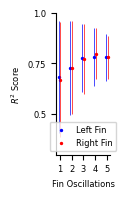

In [36]:

fig, ax = plt.subplots(figsize=(3*cm, 5*cm), facecolor='None')

# Plot phase data
ax.scatter(np.arange(len(means_osc_l)) + 0.1, means_osc_l, color='b', label='Left Fin', s=size)
ax.vlines(np.arange(len(means_osc_l)) + 0.1,
          means_osc_l - std_osc_l,
          means_osc_l + std_osc_l,
          colors='b', lw=lw)

# Plot phase data
ax.scatter(np.arange(len(means_osc_r)) + 0.25, means_osc_r, color='r', label='Right Fin', s=size)
ax.vlines(np.arange(len(means_osc_r)) + 0.25,
          means_osc_r - std_osc_r,
          means_osc_r + std_osc_r,
          colors='r', lw=lw)

# Adding labels and title
ax.set(
    xticks=np.arange(0,5,1)+0.2,
    xticklabels=np.arange(1,6,1),
    yticks=np.arange(0,1.01,0.25),
    yticklabels=np.arange(0,1.01,0.25),
    xlabel="Fin Oscillations",
    ylabel="$R^{2}$ Score",
    # title="$R^{2}$ Score by Number\nin of Fin Oscillaltions",
    ylim=(0.3, 1),
)

ax.legend(loc='lower center', fontsize=f_size)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.tight_layout()

fig.savefig(fig_dir / "r2_fins_osc.pdf", bbox_inches='tight',dpi=dpi, transparent=True)
fig.savefig(fig_dir / "r2_fins_osc.png", bbox_inches='tight',dpi=dpi, transparent=True)

## Panel E

In [18]:
features_sub_ = features.iloc[indices][:-1]

In [19]:
features_sub = features_sub_.iloc[:,4:]
features_sub.shape

(1823, 62)

In [20]:
significant_correlations = []
significant_features = []

# Assuming features_sub is a 2D array with columns representing features
for i in range(features_sub.shape[1]):
    corr = np.corrcoef(r2_flat, features_sub.iloc[:, i])[0, 1]
    if abs(corr) > 0.1:  # Check if correlation is outside the range -0.1 to 0.1
        significant_correlations.append(corr)
        significant_features.append(features_sub.columns[i])  # Assuming features_sub is a DataFrame

In [21]:
list_ = [
 'tail_direction',
 'tail_duration',
 'tail_peak_vigor',
 'tail_osc',
 'tail_time_1_peak',
 'fin_fin_corr',
 'ipsi_t_0',
 'contra_t_0',
 'tail_t_0',
 'tail_max_freq',
 'ipsi_peak_vigor',
 'contra_peak_vigor',
 'ipsi_freqs',
 'contra_freqs',
 'ipsi_osc',
 'contra_osc',
 'ipsi_duration',
 'contra_duration',
 'ipsi_max_freqs',
 'contra_max_freqs']

In [22]:
# Select columns from features_sub that are present in list_
selected_columns = features_sub.columns.intersection(list_)
selected_features_sub = features_sub[selected_columns]

selected_features_sub

,tail_direction,tail_duration,tail_peak_vigor,tail_osc,tail_time_1_peak,fin_fin_corr,ipsi_t_0,contra_t_0,tail_t_0,tail_max_freq,ipsi_peak_vigor,contra_peak_vigor,ipsi_freqs,contra_freqs,ipsi_osc,contra_osc,ipsi_duration,contra_duration,ipsi_max_freqs,contra_max_freqs
65,0.0,21.0,0.080159,3.0,-1,0.401570,4.0,15.0,10.0,0.166667,0.207131,0.252490,0.134615,0.102564,3,2,18.0,22.0,0.250000,0.250000
4209,0.0,19.0,0.147853,2.0,51,0.389325,5.0,4.0,10.0,0.166667,0.397297,0.295349,0.115385,0.138889,3,3,26.0,18.0,0.166667,0.166667
225,1.0,7.0,0.059287,1.0,-1,0.549478,16.0,8.0,9.0,0.166667,0.342808,0.311436,0.105263,0.111111,1,3,21.0,27.0,0.125000,0.250000
9,1.0,12.0,0.047102,2.0,-1,-0.152807,11.0,15.0,9.0,0.125000,0.176119,0.132858,0.093750,0.117647,3,2,27.0,12.0,0.166667,0.125000
3276,1.0,20.0,0.240293,2.0,35,0.430817,3.0,6.0,7.0,0.100000,0.252405,0.201796,0.089286,0.100000,3,2,21.0,16.0,0.166667,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,0.0,18.0,0.360089,2.0,35,0.303594,13.0,16.0,7.0,0.166667,0.287850,0.152157,0.142857,0.138889,1,1,17.0,15.0,0.166667,0.500000
789,0.0,7.0,0.364018,1.0,40,0.797879,6.0,6.0,8.0,0.500000,0.168733,0.276811,0.125000,0.096154,1,1,8.0,8.0,0.125000,0.166667
2182,0.0,18.0,0.476323,3.0,51,0.467781,6.0,6.0,7.0,0.250000,0.159941,0.035448,0.107143,0.071429,1,0,7.0,13.0,0.166667,0.166667
456,0.0,21.0,0.318137,3.0,35,0.691306,6.0,7.0,7.0,0.250000,0.276616,0.144265,0.130435,0.113636,1,2,9.0,18.0,0.166667,0.125000


In [23]:
corrs_clust = []
feat_clust  =[]
for clust in range(11):
    significant_correlations = []
    # Assuming features_sub is a 2D array with columns representing features
    for i in range(selected_features_sub.shape[1]):
        corr = np.corrcoef(r2_flat[clusters[:-1]==clust], selected_features_sub.iloc[:, i][clusters[:-1]==clust])[0, 1]
        significant_correlations.append(corr)
    corrs_clust.append(significant_correlations)


C:\Users\admin\miniconda3\envs\base_env\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\admin\miniconda3\envs\base_env\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [24]:
corrs_clust = np.asarray(corrs_clust)
corrs_clust.shape

(11, 20)

In [25]:
feat_clust = selected_features_sub.columns

In [26]:
# Create a mask for columns where any element in the column is greater than 0.1
mask = np.any(abs(corrs_clust) > 0.4, axis=0)

# Use the mask to filter the columns in corrs_clust
filtered_corrs_clust = corrs_clust[:, mask]
filtered_feat_clust = feat_clust[mask]
print("Filtered array:\n", filtered_corrs_clust.shape)


Filtered array:
 (11, 13)


In [27]:
# Exclude rows -1 and -3
# -1 corresponds to the last row and -3 corresponds to the third-to-last row
rows_to_exclude = [-1, -3]
rows_to_include = np.delete(np.arange(filtered_corrs_clust.shape[0]), rows_to_exclude)

# Filtered array after excluding specific rows
filtered_corrs_clust_excluded = filtered_corrs_clust[rows_to_include, :]


In [28]:
alph=0.01
dot_size=1
cm = 1/2.54  # centimeters in inches
f_size =6

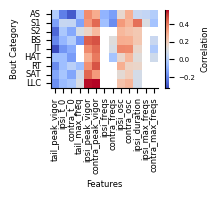

In [37]:
# Plotting heatmap
fig, ax = plt.subplots(facecolor='None',figsize=(5.5*cm, 5*cm))

ax = sns.heatmap(filtered_corrs_clust_excluded, annot=False, cmap='coolwarm', xticklabels=filtered_feat_clust)
# Add a colorbar with a label
cbar = ax.collections[0].colorbar
cbar.set_label('Correlation')
cbar.ax.tick_params(labelsize=f_size-1)
# Adding labels and title
plt.xlabel('Features')
plt.ylabel('Bout Category')
plt.yticks(np.arange(0,9,1)+0.5,labels=catname, rotation=0)

plt.tight_layout()
sns.despine(top=True, right=True, left=False, bottom=False)
plt.savefig(fig_dir / "features_r2_corr_clust_heatmap.pdf", bbox_inches='tight',dpi=dpi, transparent=True)
plt.savefig(fig_dir / "features_r2_corr_clust_heatmap.png", bbox_inches='tight',dpi=dpi, transparent=True)

## Panel F

In [30]:
results_path = master_path / 'Embeddings'

In [31]:
X_transformed = fl.load(results_path/ 'fin_cov_embeddings.h5')

In [32]:
alph=0.01
dot_size=1
cm = 1/2.54  # centimeters in inches
f_size =20
dpi= 600

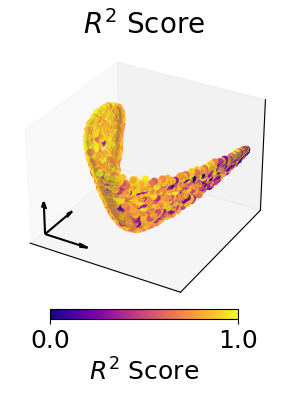

In [33]:

fig = plt.figure(figsize=(10*cm, 10*cm))
ax = fig.add_subplot(projection='3d')
fig.patch.set_facecolor('none')

ax.scatter(X_transformed[:,0],X_transformed[:,1],X_transformed[:,2], alpha=alph, s=dot_size, color = 'gray')

ins = indices[:-1]
sc= ax.scatter(X_transformed[ins,0],X_transformed[ins,1],X_transformed[ins,2], alpha=1 ,c=r2_flat, cmap='plasma')

ax.grid(b=None)
# Origin for the basis
origin = np.array([0, 0, 0])

# Define the 3 basis vectors (unit vectors along x, y, z axes)
u = np.array([1, 0, 0])  # x-axis unit vector
v = np.array([0, 1, 0])  # y-axis unit vector
w = np.array([0, 0, 1])  # z-axis unit vector

# Plot the vectors using quiver
ax.quiver(*origin, *u/3, color='k', label='x-axis (i)', arrow_length_ratio=0.2)
ax.quiver(*origin, *v/3, color='k', label='y-axis (j)', arrow_length_ratio=0.2)
ax.quiver(*origin, *w/3, color='k', label='z-axis (k)', arrow_length_ratio=0.2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.title("$R^{2}$ Score", fontsize=f_size)

cbar= plt.colorbar(sc, shrink=0.5, orientation='horizontal',pad=0)
cbar.set_label("$R^{2}$ Score", size=f_size-2)
cbar.ax.tick_params(labelsize=f_size)
cbar.set_ticks([np.min(r2_flat),np.max(r2_flat)])
cbar.set_ticklabels([np.round(np.min(r2_flat),2),np.round(np.max(r2_flat),2)], fontsize=f_size-2)

plt.tight_layout()
fig.savefig('{}/3DEMB_r2.png'.format(fig_dir), format='png', dpi=dpi)
